In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from collections import defaultdict, namedtuple, Counter
from itertools import combinations
import numpy as np
import scipy.stats as stats
import sys
from os import listdir
import json
import argparse
import random
import scipy.sparse as sparse

In [36]:
permutation_results = '../permutation_tests/phen.spark.chr8.72897465-73361654'
#permutation_results = '../permutation_tests/phen.spark.chr17.6426749-6978790'
#permutation_results = '../permutation_tests/phen.spark.chr10.125067164-126635114'

chroms = np.load('%s.chroms.npy' % permutation_results)
intervals = np.load('%s.intervals.npy' % permutation_results)
p = np.load('%s.npy' % permutation_results)
print(p.shape)

(40, 77)


In [37]:
permutation_results0 = '../permutation_tests/phen.spark.notaffaff.chr8.72897465-73361654'
chroms0 = np.load('%s.chroms.npy' % permutation_results0)
intervals0 = np.load('%s.intervals.npy' % permutation_results0)
p0 = np.load('%s.npy' % permutation_results0)
print(p0.shape)

(40, 72)


In [38]:
permutation_results1 = '../permutation_tests/phen.spark.affaff.chr8.72897465-73361654'
chroms1 = np.load('%s.chroms.npy' % permutation_results1)
intervals1 = np.load('%s.intervals.npy' % permutation_results1)
p1 = np.load('%s.npy' % permutation_results1)
print(p1.shape)

(40, 44)


//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10


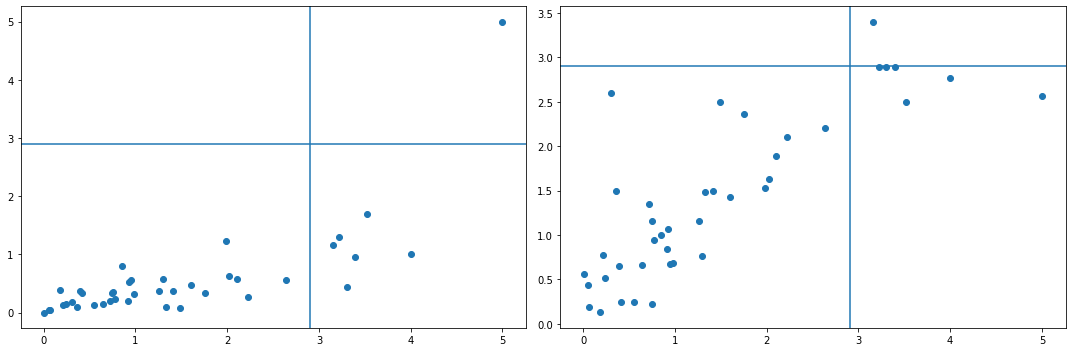

In [39]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(np.clip(-np.log10(np.min(p, axis=1)), 0, 5), 
            np.clip(-np.log10(np.min(p0, axis=1)), 0, 5))
plt.axhline(-np.log10(0.05/40))
plt.axvline(-np.log10(0.05/40))

plt.subplot(1, 2, 2)
plt.scatter(np.clip(-np.log10(np.min(p, axis=1)), 0, 5), 
            np.clip(-np.log10(np.min(p1, axis=1)), 0, 5))
plt.axhline(-np.log10(0.05/40))
plt.axvline(-np.log10(0.05/40))

plt.tight_layout()
plt.show()

In [40]:
indices = np.where(np.min(p, axis=1)<0.05/40)[0]
print(indices)
print(np.min(p, axis=1)[indices]*40)
print(np.where(np.min(p0, axis=1)<0.05/40)[0])
print(np.where(np.min(p1, axis=1)<0.05/40)[0])

[18 25 30 32 35 36 39]
[0.024 0.028 0.016 0.02  0.012 0.    0.004]
[36]
[25]


//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


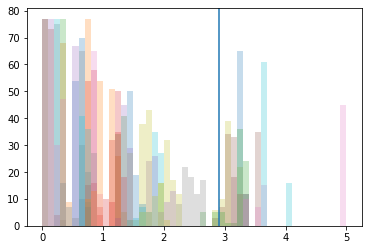

In [41]:
for i in range(40):
    plt.hist(np.clip(-np.log10(p[i, :]), None, 5), 
             bins=np.arange(0, 5.1, 0.1), alpha=0.25)
plt.axvline(-np.log10(0.05/40))
plt.show()

In [42]:
# chr8 demonstrates subclinical phenotype in aut-nt sibpairs
# 37 age 4 to 5, respond positively to child approach [REVERSE SCORED]
# unadjusted p-value 0.0004

In [43]:
indices = np.where(np.any(p<0.05/40, axis=1))[0]
print(indices+1)
print(np.min(p[indices, :], axis=1))


[19 26 31 33 36 37 40]
[0.0006 0.0007 0.0004 0.0005 0.0003 0.     0.0001]


In [166]:
# [ 8  9 19 26 33]
# [37]

# chr8: 
# 26 age 4 to 5, look at you directly in the face (eye contact)   [REVERSE SCORED]
# 31 age 4 to 5, ever comfort  [REVERSE SCORED]
# 36 age 4 to 5, interested in children [REVERSE SCORED]
# 37 age 4 to 5, respond positively to child approach [REVERSE SCORED]
# 40 age 4 to 5, ever join and play cooperatively in games with a group [REVERSE SCORED]

# chr 17:
# 15 ever mannerisms, odd hand or finger movements  
# 16 ever complicated movements of whole body